In [1]:
import scipy
import numpy as np
import matplotlib
import pandas
import sklearn
import pydot
import h5py

import tensorflow
import keras

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.callbacks import EarlyStopping
np.random.seed(3)

## 1. Generate data set.

# get train set and test set from keras.(numpy ndarray data type.)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #여기서 테스트와 트레인 데이터 셋을 각각 가져옴(튜플로 되어있음))


# seperate train set and validation set.
X_val = X_train[50000:] # 10000개.
Y_val = Y_train[50000:] # 10000개 
X_train = X_train[:50000] # 50,000 개
Y_train = Y_train[:50000] # 50,000 개 

X_train = X_train.reshape(50000, 784).astype('float32') / 255.0  #28*28 짜리 데이터를 쭉 펴는듯?
X_val = X_val.reshape(10000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32')/255.0

# make 700 numbers of value between 0~49999
train_rand_idxs = np.random.choice(50000, 700) # 0~49999까지의 렌덤 인덱스 700개를 뽑는다.
val_rand_idxs = np.random.choice(10000, 300) # 0~9999까지의 랜덤 인덱스 300개를 뽑는다.

X_train = X_train[train_rand_idxs] # 트레인 데이터 700개를 랜덤 추출.
Y_train = Y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs] #검증 데이터 300개를 랜덤 인덱스로 추출.
Y_val = Y_val[val_rand_idxs]

# one-hot encoding.
Y_train = np_utils.to_categorical(Y_train) #Y데이터들을 categorical 하게 만든다.
Y_val = np_utils.to_categorical(Y_val)
Y_test = np_utils.to_categorical(Y_test)

Using TensorFlow backend.


In [2]:
earlyStopping = EarlyStopping()
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
hist = model.fit(X_train, Y_train, epochs=3000, batch_size=10, validation_data=(X_val, Y_val), callbacks=[early_stopping])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 372us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 99us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 109us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 98us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 107us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 102us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 98us/step - loss: 2.0719 - acc: 0.2086 - val_loss: 2.0727 - val_acc: 0.2067
Epoch

700/700 [==============================] - 0s 93us/step - loss: 1.7549 - acc: 0.2614 - val_loss: 1.8261 - val_acc: 0.2533
Epoch 61/3000
700/700 [==============================] - 0s 112us/step - loss: 1.7563 - acc: 0.2843 - val_loss: 1.8338 - val_acc: 0.2367
Epoch 62/3000
700/700 [==============================] - 0s 105us/step - loss: 1.7528 - acc: 0.2700 - val_loss: 1.8319 - val_acc: 0.2233
Epoch 63/3000
700/700 [==============================] - 0s 104us/step - loss: 1.7501 - acc: 0.2800 - val_loss: 1.8304 - val_acc: 0.2000
Epoch 64/3000
700/700 [==============================] - 0s 92us/step - loss: 1.7480 - acc: 0.2800 - val_loss: 1.8279 - val_acc: 0.2167
Epoch 65/3000
700/700 [==============================] - 0s 110us/step - loss: 1.7455 - acc: 0.2843 - val_loss: 1.8307 - val_acc: 0.2000
Epoch 66/3000
700/700 [==============================] - 0s 104us/step - loss: 1.7436 - acc: 0.2800 - val_loss: 1.8305 - val_acc: 0.2067
Epoch 67/3000
700/700 [==============================] - 

Epoch 120/3000
700/700 [==============================] - 0s 106us/step - loss: 1.6647 - acc: 0.3200 - val_loss: 1.8247 - val_acc: 0.2200
Epoch 121/3000
700/700 [==============================] - 0s 98us/step - loss: 1.6634 - acc: 0.3171 - val_loss: 1.8151 - val_acc: 0.2267
Epoch 122/3000
700/700 [==============================] - 0s 120us/step - loss: 1.6623 - acc: 0.3214 - val_loss: 1.8195 - val_acc: 0.2267
Epoch 123/3000
700/700 [==============================] - 0s 107us/step - loss: 1.6614 - acc: 0.3214 - val_loss: 1.8166 - val_acc: 0.2233
Epoch 124/3000
700/700 [==============================] - 0s 93us/step - loss: 1.6601 - acc: 0.3186 - val_loss: 1.8238 - val_acc: 0.2367
Epoch 125/3000
700/700 [==============================] - 0s 99us/step - loss: 1.6590 - acc: 0.3171 - val_loss: 1.8289 - val_acc: 0.2367
Epoch 126/3000
700/700 [==============================] - 0s 108us/step - loss: 1.6573 - acc: 0.3186 - val_loss: 1.8289 - val_acc: 0.2267
Epoch 127/3000
700/700 [=============

700/700 [==============================] - 0s 107us/step - loss: 1.6125 - acc: 0.3486 - val_loss: 1.8383 - val_acc: 0.2233
Epoch 180/3000
700/700 [==============================] - 0s 95us/step - loss: 1.6103 - acc: 0.3400 - val_loss: 1.8456 - val_acc: 0.2667
Epoch 181/3000
700/700 [==============================] - 0s 102us/step - loss: 1.6106 - acc: 0.3471 - val_loss: 1.8368 - val_acc: 0.2600
Epoch 182/3000
700/700 [==============================] - 0s 104us/step - loss: 1.6097 - acc: 0.3443 - val_loss: 1.8396 - val_acc: 0.2167
Epoch 183/3000
700/700 [==============================] - 0s 100us/step - loss: 1.6106 - acc: 0.3343 - val_loss: 1.8448 - val_acc: 0.2333
Epoch 184/3000
700/700 [==============================] - 0s 98us/step - loss: 1.6084 - acc: 0.3514 - val_loss: 1.8469 - val_acc: 0.2267
Epoch 185/3000
700/700 [==============================] - 0s 118us/step - loss: 1.6067 - acc: 0.3400 - val_loss: 1.8662 - val_acc: 0.2233
Epoch 186/3000
700/700 [===========================

700/700 [==============================] - 0s 109us/step - loss: 1.5769 - acc: 0.3471 - val_loss: 1.8670 - val_acc: 0.2133
Epoch 239/3000
700/700 [==============================] - 0s 117us/step - loss: 1.5765 - acc: 0.3543 - val_loss: 1.8738 - val_acc: 0.2300
Epoch 240/3000
700/700 [==============================] - 0s 101us/step - loss: 1.5745 - acc: 0.3529 - val_loss: 1.8759 - val_acc: 0.2467
Epoch 241/3000
700/700 [==============================] - 0s 110us/step - loss: 1.5743 - acc: 0.3571 - val_loss: 1.8777 - val_acc: 0.2433
Epoch 242/3000
700/700 [==============================] - 0s 107us/step - loss: 1.5739 - acc: 0.3543 - val_loss: 1.8778 - val_acc: 0.2067
Epoch 243/3000
700/700 [==============================] - 0s 114us/step - loss: 1.5737 - acc: 0.3600 - val_loss: 1.8840 - val_acc: 0.2167
Epoch 244/3000
700/700 [==============================] - 0s 99us/step - loss: 1.5708 - acc: 0.3586 - val_loss: 1.8764 - val_acc: 0.2200
Epoch 245/3000
700/700 [==========================

700/700 [==============================] - 0s 99us/step - loss: 1.5475 - acc: 0.3586 - val_loss: 1.9183 - val_acc: 0.2200
Epoch 298/3000
700/700 [==============================] - 0s 94us/step - loss: 1.5473 - acc: 0.3486 - val_loss: 1.9015 - val_acc: 0.2300
Epoch 299/3000
700/700 [==============================] - 0s 106us/step - loss: 1.5479 - acc: 0.3671 - val_loss: 1.9230 - val_acc: 0.2300
Epoch 300/3000
700/700 [==============================] - 0s 96us/step - loss: 1.5469 - acc: 0.3643 - val_loss: 1.9092 - val_acc: 0.2300
Epoch 301/3000
700/700 [==============================] - 0s 95us/step - loss: 1.5466 - acc: 0.3629 - val_loss: 1.8989 - val_acc: 0.2200
Epoch 302/3000
700/700 [==============================] - 0s 104us/step - loss: 1.5476 - acc: 0.3671 - val_loss: 1.9138 - val_acc: 0.2200
Epoch 303/3000
700/700 [==============================] - 0s 101us/step - loss: 1.5461 - acc: 0.3543 - val_loss: 1.9057 - val_acc: 0.2367
Epoch 304/3000
700/700 [=============================

700/700 [==============================] - 0s 82us/step - loss: 1.5254 - acc: 0.3700 - val_loss: 1.9517 - val_acc: 0.2433
Epoch 357/3000
700/700 [==============================] - 0s 109us/step - loss: 1.5253 - acc: 0.3714 - val_loss: 1.9437 - val_acc: 0.2300
Epoch 358/3000
700/700 [==============================] - 0s 100us/step - loss: 1.5245 - acc: 0.3714 - val_loss: 1.9563 - val_acc: 0.2167
Epoch 359/3000
700/700 [==============================] - 0s 82us/step - loss: 1.5247 - acc: 0.3771 - val_loss: 1.9521 - val_acc: 0.2200
Epoch 360/3000
700/700 [==============================] - 0s 114us/step - loss: 1.5228 - acc: 0.3714 - val_loss: 1.9538 - val_acc: 0.2233
Epoch 361/3000
700/700 [==============================] - 0s 98us/step - loss: 1.5226 - acc: 0.3729 - val_loss: 1.9545 - val_acc: 0.2333
Epoch 362/3000
700/700 [==============================] - 0s 99us/step - loss: 1.5235 - acc: 0.3671 - val_loss: 1.9589 - val_acc: 0.2200
Epoch 363/3000
700/700 [=============================

700/700 [==============================] - 0s 81us/step - loss: 1.5014 - acc: 0.3714 - val_loss: 1.9846 - val_acc: 0.2400
Epoch 416/3000
700/700 [==============================] - 0s 105us/step - loss: 1.5026 - acc: 0.3886 - val_loss: 1.9948 - val_acc: 0.2133
Epoch 417/3000
700/700 [==============================] - 0s 113us/step - loss: 1.5033 - acc: 0.3771 - val_loss: 1.9844 - val_acc: 0.2267
Epoch 418/3000
700/700 [==============================] - 0s 96us/step - loss: 1.5017 - acc: 0.3857 - val_loss: 1.9840 - val_acc: 0.2400
Epoch 419/3000
700/700 [==============================] - 0s 91us/step - loss: 1.5019 - acc: 0.3814 - val_loss: 1.9715 - val_acc: 0.2267
Epoch 420/3000
700/700 [==============================] - 0s 99us/step - loss: 1.5018 - acc: 0.3843 - val_loss: 1.9954 - val_acc: 0.2300
Epoch 421/3000
700/700 [==============================] - 0s 100us/step - loss: 1.5018 - acc: 0.3886 - val_loss: 1.9746 - val_acc: 0.2400
Epoch 422/3000
700/700 [=============================

700/700 [==============================] - 0s 103us/step - loss: 1.4854 - acc: 0.3929 - val_loss: 1.9940 - val_acc: 0.2300
Epoch 475/3000
700/700 [==============================] - 0s 110us/step - loss: 1.4860 - acc: 0.3900 - val_loss: 2.0028 - val_acc: 0.2200
Epoch 476/3000
700/700 [==============================] - 0s 107us/step - loss: 1.4850 - acc: 0.3871 - val_loss: 2.0027 - val_acc: 0.2267
Epoch 477/3000
700/700 [==============================] - 0s 106us/step - loss: 1.4857 - acc: 0.3971 - val_loss: 2.0055 - val_acc: 0.2233
Epoch 478/3000
700/700 [==============================] - 0s 102us/step - loss: 1.4853 - acc: 0.3943 - val_loss: 2.0066 - val_acc: 0.2233
Epoch 479/3000
700/700 [==============================] - 0s 108us/step - loss: 1.4850 - acc: 0.3871 - val_loss: 1.9961 - val_acc: 0.2267
Epoch 480/3000
700/700 [==============================] - 0s 109us/step - loss: 1.4843 - acc: 0.3957 - val_loss: 2.0161 - val_acc: 0.2367
Epoch 481/3000
700/700 [=========================

700/700 [==============================] - 0s 98us/step - loss: 1.4712 - acc: 0.4000 - val_loss: 2.0227 - val_acc: 0.2267
Epoch 534/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4719 - acc: 0.3943 - val_loss: 2.0228 - val_acc: 0.2333
Epoch 535/3000
700/700 [==============================] - 0s 90us/step - loss: 1.4704 - acc: 0.3943 - val_loss: 2.0436 - val_acc: 0.2367
Epoch 536/3000
700/700 [==============================] - 0s 93us/step - loss: 1.4699 - acc: 0.3971 - val_loss: 2.0451 - val_acc: 0.2233
Epoch 537/3000
700/700 [==============================] - 0s 98us/step - loss: 1.4707 - acc: 0.3957 - val_loss: 2.0248 - val_acc: 0.2300
Epoch 538/3000
700/700 [==============================] - 0s 105us/step - loss: 1.4699 - acc: 0.3886 - val_loss: 2.0366 - val_acc: 0.2333
Epoch 539/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4723 - acc: 0.3900 - val_loss: 2.0222 - val_acc: 0.2233
Epoch 540/3000
700/700 [==============================

700/700 [==============================] - 0s 101us/step - loss: 1.4581 - acc: 0.4029 - val_loss: 2.0515 - val_acc: 0.2333
Epoch 593/3000
700/700 [==============================] - 0s 121us/step - loss: 1.4581 - acc: 0.4014 - val_loss: 2.0431 - val_acc: 0.2267
Epoch 594/3000
700/700 [==============================] - 0s 97us/step - loss: 1.4578 - acc: 0.4157 - val_loss: 2.0441 - val_acc: 0.2333
Epoch 595/3000
700/700 [==============================] - 0s 102us/step - loss: 1.4577 - acc: 0.4043 - val_loss: 2.0479 - val_acc: 0.2333
Epoch 596/3000
700/700 [==============================] - 0s 112us/step - loss: 1.4573 - acc: 0.4043 - val_loss: 2.0389 - val_acc: 0.2300
Epoch 597/3000
700/700 [==============================] - 0s 106us/step - loss: 1.4563 - acc: 0.4071 - val_loss: 2.0436 - val_acc: 0.2500
Epoch 598/3000
700/700 [==============================] - 0s 125us/step - loss: 1.4573 - acc: 0.3971 - val_loss: 2.0434 - val_acc: 0.2267
Epoch 599/3000
700/700 [==========================

700/700 [==============================] - 0s 94us/step - loss: 1.4461 - acc: 0.4100 - val_loss: 2.0836 - val_acc: 0.2400
Epoch 652/3000
700/700 [==============================] - 0s 99us/step - loss: 1.4469 - acc: 0.4129 - val_loss: 2.0707 - val_acc: 0.2333
Epoch 653/3000
700/700 [==============================] - 0s 75us/step - loss: 1.4454 - acc: 0.4129 - val_loss: 2.0710 - val_acc: 0.2467
Epoch 654/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4457 - acc: 0.4114 - val_loss: 2.0584 - val_acc: 0.2467
Epoch 655/3000
700/700 [==============================] - 0s 101us/step - loss: 1.4446 - acc: 0.4114 - val_loss: 2.0685 - val_acc: 0.2467
Epoch 656/3000
700/700 [==============================] - 0s 104us/step - loss: 1.4467 - acc: 0.4071 - val_loss: 2.0810 - val_acc: 0.2400
Epoch 657/3000
700/700 [==============================] - 0s 98us/step - loss: 1.4450 - acc: 0.4086 - val_loss: 2.0705 - val_acc: 0.2300
Epoch 658/3000
700/700 [==============================

Epoch 711/3000
700/700 [==============================] - 0s 118us/step - loss: 1.4347 - acc: 0.4129 - val_loss: 2.0858 - val_acc: 0.2400
Epoch 712/3000
700/700 [==============================] - 0s 122us/step - loss: 1.4343 - acc: 0.4129 - val_loss: 2.0915 - val_acc: 0.2567
Epoch 713/3000
700/700 [==============================] - 0s 83us/step - loss: 1.4353 - acc: 0.4143 - val_loss: 2.0762 - val_acc: 0.2367
Epoch 714/3000
700/700 [==============================] - 0s 98us/step - loss: 1.4348 - acc: 0.4200 - val_loss: 2.0902 - val_acc: 0.2400
Epoch 715/3000
700/700 [==============================] - 0s 95us/step - loss: 1.4324 - acc: 0.4243 - val_loss: 2.0835 - val_acc: 0.2567
Epoch 716/3000
700/700 [==============================] - 0s 80us/step - loss: 1.4350 - acc: 0.4114 - val_loss: 2.0931 - val_acc: 0.2433
Epoch 717/3000
700/700 [==============================] - 0s 102us/step - loss: 1.4342 - acc: 0.4157 - val_loss: 2.0920 - val_acc: 0.2333
Epoch 718/3000
700/700 [==============

700/700 [==============================] - 0s 93us/step - loss: 1.4241 - acc: 0.4214 - val_loss: 2.0988 - val_acc: 0.2367
Epoch 771/3000
700/700 [==============================] - 0s 100us/step - loss: 1.4233 - acc: 0.4200 - val_loss: 2.1173 - val_acc: 0.2400
Epoch 772/3000
700/700 [==============================] - 0s 103us/step - loss: 1.4240 - acc: 0.4200 - val_loss: 2.1150 - val_acc: 0.2367
Epoch 773/3000
700/700 [==============================] - 0s 98us/step - loss: 1.4241 - acc: 0.4171 - val_loss: 2.1243 - val_acc: 0.2467
Epoch 774/3000
700/700 [==============================] - 0s 120us/step - loss: 1.4229 - acc: 0.4143 - val_loss: 2.1170 - val_acc: 0.2433
Epoch 775/3000
700/700 [==============================] - 0s 120us/step - loss: 1.4218 - acc: 0.4271 - val_loss: 2.1215 - val_acc: 0.2567
Epoch 776/3000
700/700 [==============================] - 0s 97us/step - loss: 1.4233 - acc: 0.4200 - val_loss: 2.1108 - val_acc: 0.2433
Epoch 777/3000
700/700 [============================

700/700 [==============================] - 0s 96us/step - loss: 1.4146 - acc: 0.4271 - val_loss: 2.1325 - val_acc: 0.2433
Epoch 830/3000
700/700 [==============================] - 0s 83us/step - loss: 1.4144 - acc: 0.4300 - val_loss: 2.1333 - val_acc: 0.2433
Epoch 831/3000
700/700 [==============================] - 0s 108us/step - loss: 1.4141 - acc: 0.4400 - val_loss: 2.1454 - val_acc: 0.2467
Epoch 832/3000
700/700 [==============================] - 0s 104us/step - loss: 1.4149 - acc: 0.4329 - val_loss: 2.1497 - val_acc: 0.2400
Epoch 833/3000
700/700 [==============================] - 0s 84us/step - loss: 1.4146 - acc: 0.4257 - val_loss: 2.1542 - val_acc: 0.2333
Epoch 834/3000
700/700 [==============================] - 0s 107us/step - loss: 1.4146 - acc: 0.4271 - val_loss: 2.1624 - val_acc: 0.2433
Epoch 835/3000
700/700 [==============================] - 0s 97us/step - loss: 1.4135 - acc: 0.4243 - val_loss: 2.1334 - val_acc: 0.2400
Epoch 836/3000
700/700 [=============================

700/700 [==============================] - 0s 104us/step - loss: 1.4065 - acc: 0.4314 - val_loss: 2.1550 - val_acc: 0.2500
Epoch 889/3000
700/700 [==============================] - 0s 110us/step - loss: 1.4048 - acc: 0.4386 - val_loss: 2.1648 - val_acc: 0.2600
Epoch 890/3000
700/700 [==============================] - 0s 110us/step - loss: 1.4065 - acc: 0.4357 - val_loss: 2.1527 - val_acc: 0.2633
Epoch 891/3000
700/700 [==============================] - 0s 89us/step - loss: 1.4062 - acc: 0.4286 - val_loss: 2.1573 - val_acc: 0.2533
Epoch 892/3000
700/700 [==============================] - 0s 107us/step - loss: 1.4061 - acc: 0.4357 - val_loss: 2.1623 - val_acc: 0.2533
Epoch 893/3000
700/700 [==============================] - 0s 99us/step - loss: 1.4056 - acc: 0.4329 - val_loss: 2.1670 - val_acc: 0.2533
Epoch 894/3000
700/700 [==============================] - 0s 91us/step - loss: 1.4058 - acc: 0.4386 - val_loss: 2.1545 - val_acc: 0.2433
Epoch 895/3000
700/700 [============================

700/700 [==============================] - 0s 99us/step - loss: 1.3976 - acc: 0.4386 - val_loss: 2.1885 - val_acc: 0.2633
Epoch 948/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3979 - acc: 0.4286 - val_loss: 2.1623 - val_acc: 0.2367
Epoch 949/3000
700/700 [==============================] - 0s 106us/step - loss: 1.3978 - acc: 0.4400 - val_loss: 2.1655 - val_acc: 0.2433
Epoch 950/3000
700/700 [==============================] - 0s 112us/step - loss: 1.3967 - acc: 0.4386 - val_loss: 2.1726 - val_acc: 0.2433
Epoch 951/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3977 - acc: 0.4343 - val_loss: 2.1807 - val_acc: 0.2567
Epoch 952/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3977 - acc: 0.4386 - val_loss: 2.1795 - val_acc: 0.2467
Epoch 953/3000
700/700 [==============================] - 0s 112us/step - loss: 1.3976 - acc: 0.4371 - val_loss: 2.1797 - val_acc: 0.2600
Epoch 954/3000
700/700 [===========================

700/700 [==============================] - 0s 109us/step - loss: 1.3907 - acc: 0.4371 - val_loss: 2.2188 - val_acc: 0.2400
Epoch 1007/3000
700/700 [==============================] - 0s 105us/step - loss: 1.3904 - acc: 0.4386 - val_loss: 2.2158 - val_acc: 0.2533
Epoch 1008/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3910 - acc: 0.4400 - val_loss: 2.1915 - val_acc: 0.2500
Epoch 1009/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3902 - acc: 0.4429 - val_loss: 2.2183 - val_acc: 0.2467
Epoch 1010/3000
700/700 [==============================] - 0s 108us/step - loss: 1.3906 - acc: 0.4414 - val_loss: 2.1965 - val_acc: 0.2500
Epoch 1011/3000
700/700 [==============================] - 0s 115us/step - loss: 1.3897 - acc: 0.4414 - val_loss: 2.2035 - val_acc: 0.2467
Epoch 1012/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3890 - acc: 0.4371 - val_loss: 2.2236 - val_acc: 0.2467
Epoch 1013/3000
700/700 [==================

700/700 [==============================] - 0s 112us/step - loss: 1.3841 - acc: 0.4357 - val_loss: 2.2101 - val_acc: 0.2367
Epoch 1066/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3840 - acc: 0.4400 - val_loss: 2.2134 - val_acc: 0.2300
Epoch 1067/3000
700/700 [==============================] - 0s 84us/step - loss: 1.3836 - acc: 0.4429 - val_loss: 2.2367 - val_acc: 0.2433
Epoch 1068/3000
700/700 [==============================] - 0s 106us/step - loss: 1.3834 - acc: 0.4429 - val_loss: 2.2337 - val_acc: 0.2433
Epoch 1069/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3834 - acc: 0.4400 - val_loss: 2.2285 - val_acc: 0.2433
Epoch 1070/3000
700/700 [==============================] - 0s 85us/step - loss: 1.3828 - acc: 0.4414 - val_loss: 2.2198 - val_acc: 0.2367
Epoch 1071/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3823 - acc: 0.4443 - val_loss: 2.2395 - val_acc: 0.2267
Epoch 1072/3000
700/700 [=======================

700/700 [==============================] - 0s 113us/step - loss: 1.3769 - acc: 0.4414 - val_loss: 2.2387 - val_acc: 0.2400
Epoch 1124/3000
700/700 [==============================] - 0s 121us/step - loss: 1.3782 - acc: 0.4486 - val_loss: 2.2320 - val_acc: 0.2400
Epoch 1125/3000
700/700 [==============================] - 0s 113us/step - loss: 1.3778 - acc: 0.4457 - val_loss: 2.2325 - val_acc: 0.2367
Epoch 1126/3000
700/700 [==============================] - 0s 105us/step - loss: 1.3763 - acc: 0.4571 - val_loss: 2.2339 - val_acc: 0.2467
Epoch 1127/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3768 - acc: 0.4543 - val_loss: 2.2413 - val_acc: 0.2400
Epoch 1128/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3777 - acc: 0.4429 - val_loss: 2.2587 - val_acc: 0.2433
Epoch 1129/3000
700/700 [==============================] - 0s 117us/step - loss: 1.3761 - acc: 0.4443 - val_loss: 2.2420 - val_acc: 0.2200
Epoch 1130/3000
700/700 [===================

700/700 [==============================] - 0s 106us/step - loss: 1.3722 - acc: 0.4471 - val_loss: 2.2478 - val_acc: 0.2300
Epoch 1183/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3716 - acc: 0.4500 - val_loss: 2.2515 - val_acc: 0.2400
Epoch 1184/3000
700/700 [==============================] - 0s 106us/step - loss: 1.3702 - acc: 0.4543 - val_loss: 2.2428 - val_acc: 0.2300
Epoch 1185/3000
700/700 [==============================] - 0s 83us/step - loss: 1.3715 - acc: 0.4529 - val_loss: 2.2477 - val_acc: 0.2267
Epoch 1186/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3712 - acc: 0.4486 - val_loss: 2.2600 - val_acc: 0.2333
Epoch 1187/3000
700/700 [==============================] - 0s 106us/step - loss: 1.3705 - acc: 0.4471 - val_loss: 2.2500 - val_acc: 0.2267
Epoch 1188/3000
700/700 [==============================] - 0s 105us/step - loss: 1.3707 - acc: 0.4571 - val_loss: 2.2613 - val_acc: 0.2367
Epoch 1189/3000
700/700 [====================

700/700 [==============================] - 0s 98us/step - loss: 1.3656 - acc: 0.4557 - val_loss: 2.2650 - val_acc: 0.2367
Epoch 1242/3000
700/700 [==============================] - 0s 95us/step - loss: 1.3649 - acc: 0.4529 - val_loss: 2.2603 - val_acc: 0.2333
Epoch 1243/3000
700/700 [==============================] - 0s 89us/step - loss: 1.3654 - acc: 0.4614 - val_loss: 2.2725 - val_acc: 0.2367
Epoch 1244/3000
700/700 [==============================] - 0s 109us/step - loss: 1.3654 - acc: 0.4557 - val_loss: 2.2480 - val_acc: 0.2333
Epoch 1245/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3651 - acc: 0.4543 - val_loss: 2.2527 - val_acc: 0.2333
Epoch 1246/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3644 - acc: 0.4557 - val_loss: 2.2747 - val_acc: 0.2400
Epoch 1247/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3641 - acc: 0.4586 - val_loss: 2.2669 - val_acc: 0.2433
Epoch 1248/3000
700/700 [========================

700/700 [==============================] - 0s 102us/step - loss: 1.3589 - acc: 0.4657 - val_loss: 2.2757 - val_acc: 0.2300
Epoch 1301/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3587 - acc: 0.4529 - val_loss: 2.2634 - val_acc: 0.2367
Epoch 1302/3000
700/700 [==============================] - 0s 117us/step - loss: 1.3603 - acc: 0.4571 - val_loss: 2.2823 - val_acc: 0.2367
Epoch 1303/3000
700/700 [==============================] - 0s 116us/step - loss: 1.3602 - acc: 0.4629 - val_loss: 2.2786 - val_acc: 0.2367
Epoch 1304/3000
700/700 [==============================] - 0s 109us/step - loss: 1.3595 - acc: 0.4657 - val_loss: 2.2913 - val_acc: 0.2333
Epoch 1305/3000
700/700 [==============================] - 0s 120us/step - loss: 1.3590 - acc: 0.4614 - val_loss: 2.2790 - val_acc: 0.2333
Epoch 1306/3000
700/700 [==============================] - 0s 89us/step - loss: 1.3592 - acc: 0.4557 - val_loss: 2.2765 - val_acc: 0.2400
Epoch 1307/3000
700/700 [===================

700/700 [==============================] - 0s 92us/step - loss: 1.3541 - acc: 0.4657 - val_loss: 2.2958 - val_acc: 0.2367
Epoch 1360/3000
700/700 [==============================] - 0s 109us/step - loss: 1.3547 - acc: 0.4657 - val_loss: 2.2800 - val_acc: 0.2367
Epoch 1361/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3553 - acc: 0.4586 - val_loss: 2.3028 - val_acc: 0.2367
Epoch 1362/3000
700/700 [==============================] - 0s 82us/step - loss: 1.3541 - acc: 0.4614 - val_loss: 2.2828 - val_acc: 0.2300
Epoch 1363/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3545 - acc: 0.4657 - val_loss: 2.2905 - val_acc: 0.2300
Epoch 1364/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3540 - acc: 0.4600 - val_loss: 2.3012 - val_acc: 0.2333
Epoch 1365/3000
700/700 [==============================] - 0s 80us/step - loss: 1.3549 - acc: 0.4671 - val_loss: 2.2795 - val_acc: 0.2300
Epoch 1366/3000
700/700 [======================

700/700 [==============================] - 0s 98us/step - loss: 1.3489 - acc: 0.4643 - val_loss: 2.3006 - val_acc: 0.2400
Epoch 1419/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3503 - acc: 0.4629 - val_loss: 2.2933 - val_acc: 0.2367
Epoch 1420/3000
700/700 [==============================] - 0s 110us/step - loss: 1.3497 - acc: 0.4657 - val_loss: 2.3234 - val_acc: 0.2333
Epoch 1421/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3500 - acc: 0.4657 - val_loss: 2.3089 - val_acc: 0.2367
Epoch 1422/3000
700/700 [==============================] - 0s 92us/step - loss: 1.3481 - acc: 0.4600 - val_loss: 2.3049 - val_acc: 0.2400
Epoch 1423/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3489 - acc: 0.4643 - val_loss: 2.3172 - val_acc: 0.2300
Epoch 1424/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3500 - acc: 0.4657 - val_loss: 2.3116 - val_acc: 0.2367
Epoch 1425/3000
700/700 [========================

700/700 [==============================] - 0s 120us/step - loss: 1.3453 - acc: 0.4657 - val_loss: 2.3262 - val_acc: 0.2367
Epoch 1478/3000
700/700 [==============================] - 0s 116us/step - loss: 1.3447 - acc: 0.4757 - val_loss: 2.3029 - val_acc: 0.2367
Epoch 1479/3000
700/700 [==============================] - 0s 122us/step - loss: 1.3447 - acc: 0.4614 - val_loss: 2.3161 - val_acc: 0.2333
Epoch 1480/3000
700/700 [==============================] - 0s 108us/step - loss: 1.3452 - acc: 0.4671 - val_loss: 2.3180 - val_acc: 0.2300
Epoch 1481/3000
700/700 [==============================] - 0s 112us/step - loss: 1.3446 - acc: 0.4671 - val_loss: 2.3208 - val_acc: 0.2267
Epoch 1482/3000
700/700 [==============================] - 0s 111us/step - loss: 1.3445 - acc: 0.4686 - val_loss: 2.3408 - val_acc: 0.2400
Epoch 1483/3000
700/700 [==============================] - 0s 108us/step - loss: 1.3453 - acc: 0.4700 - val_loss: 2.3284 - val_acc: 0.2333
Epoch 1484/3000
700/700 [==================

700/700 [==============================] - 0s 105us/step - loss: 1.3403 - acc: 0.4671 - val_loss: 2.3339 - val_acc: 0.2333
Epoch 1537/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3403 - acc: 0.4729 - val_loss: 2.3346 - val_acc: 0.2367
Epoch 1538/3000
700/700 [==============================] - 0s 108us/step - loss: 1.3399 - acc: 0.4757 - val_loss: 2.3203 - val_acc: 0.2333
Epoch 1539/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3400 - acc: 0.4700 - val_loss: 2.3159 - val_acc: 0.2400
Epoch 1540/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3399 - acc: 0.4657 - val_loss: 2.3282 - val_acc: 0.2400
Epoch 1541/3000
700/700 [==============================] - 0s 100us/step - loss: 1.3406 - acc: 0.4657 - val_loss: 2.3426 - val_acc: 0.2400
Epoch 1542/3000
700/700 [==============================] - 0s 106us/step - loss: 1.3401 - acc: 0.4729 - val_loss: 2.3371 - val_acc: 0.2333
Epoch 1543/3000
700/700 [====================

700/700 [==============================] - 0s 104us/step - loss: 1.3356 - acc: 0.4714 - val_loss: 2.3432 - val_acc: 0.2400
Epoch 1596/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3360 - acc: 0.4714 - val_loss: 2.3317 - val_acc: 0.2367
Epoch 1597/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3363 - acc: 0.4714 - val_loss: 2.3424 - val_acc: 0.2367
Epoch 1598/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3369 - acc: 0.4743 - val_loss: 2.3475 - val_acc: 0.2333
Epoch 1599/3000
700/700 [==============================] - 0s 83us/step - loss: 1.3357 - acc: 0.4686 - val_loss: 2.3453 - val_acc: 0.2400
Epoch 1600/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3360 - acc: 0.4714 - val_loss: 2.3549 - val_acc: 0.2400
Epoch 1601/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3363 - acc: 0.4786 - val_loss: 2.3401 - val_acc: 0.2400
Epoch 1602/3000
700/700 [=====================

700/700 [==============================] - 0s 104us/step - loss: 1.3339 - acc: 0.4600 - val_loss: 2.3564 - val_acc: 0.2400
Epoch 1655/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3316 - acc: 0.4729 - val_loss: 2.3602 - val_acc: 0.2433
Epoch 1656/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3327 - acc: 0.4743 - val_loss: 2.3544 - val_acc: 0.2367
Epoch 1657/3000
700/700 [==============================] - 0s 108us/step - loss: 1.3318 - acc: 0.4786 - val_loss: 2.3824 - val_acc: 0.2400
Epoch 1658/3000
700/700 [==============================] - 0s 84us/step - loss: 1.3316 - acc: 0.4757 - val_loss: 2.3621 - val_acc: 0.2333
Epoch 1659/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3317 - acc: 0.4800 - val_loss: 2.3512 - val_acc: 0.2400
Epoch 1660/3000
700/700 [==============================] - 0s 118us/step - loss: 1.3310 - acc: 0.4743 - val_loss: 2.3659 - val_acc: 0.2400
Epoch 1661/3000
700/700 [=====================

700/700 [==============================] - 0s 101us/step - loss: 1.3266 - acc: 0.4757 - val_loss: 2.3955 - val_acc: 0.2367
Epoch 1714/3000
700/700 [==============================] - 0s 120us/step - loss: 1.3279 - acc: 0.4743 - val_loss: 2.3554 - val_acc: 0.2367
Epoch 1715/3000
700/700 [==============================] - 0s 113us/step - loss: 1.3270 - acc: 0.4743 - val_loss: 2.3970 - val_acc: 0.2400
Epoch 1716/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3269 - acc: 0.4786 - val_loss: 2.3924 - val_acc: 0.2400
Epoch 1717/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3268 - acc: 0.4771 - val_loss: 2.3728 - val_acc: 0.2400
Epoch 1718/3000
700/700 [==============================] - 0s 112us/step - loss: 1.3277 - acc: 0.4800 - val_loss: 2.3822 - val_acc: 0.2367
Epoch 1719/3000
700/700 [==============================] - 0s 128us/step - loss: 1.3272 - acc: 0.4800 - val_loss: 2.3454 - val_acc: 0.2333
Epoch 1720/3000
700/700 [===================

700/700 [==============================] - 0s 96us/step - loss: 1.3234 - acc: 0.4786 - val_loss: 2.4003 - val_acc: 0.2367
Epoch 1773/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3226 - acc: 0.4814 - val_loss: 2.3871 - val_acc: 0.2367
Epoch 1774/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3236 - acc: 0.4814 - val_loss: 2.3865 - val_acc: 0.2333
Epoch 1775/3000
700/700 [==============================] - 0s 92us/step - loss: 1.3233 - acc: 0.4814 - val_loss: 2.4058 - val_acc: 0.2367
Epoch 1776/3000
700/700 [==============================] - 0s 90us/step - loss: 1.3233 - acc: 0.4800 - val_loss: 2.3762 - val_acc: 0.2367
Epoch 1777/3000
700/700 [==============================] - 0s 105us/step - loss: 1.3225 - acc: 0.4771 - val_loss: 2.3930 - val_acc: 0.2333
Epoch 1778/3000
700/700 [==============================] - 0s 86us/step - loss: 1.3226 - acc: 0.4814 - val_loss: 2.3734 - val_acc: 0.2367
Epoch 1779/3000
700/700 [=======================

700/700 [==============================] - 0s 94us/step - loss: 1.3194 - acc: 0.4814 - val_loss: 2.4033 - val_acc: 0.2333
Epoch 1832/3000
700/700 [==============================] - 0s 109us/step - loss: 1.3193 - acc: 0.4829 - val_loss: 2.4150 - val_acc: 0.2400
Epoch 1833/3000
700/700 [==============================] - 0s 118us/step - loss: 1.3194 - acc: 0.4786 - val_loss: 2.4216 - val_acc: 0.2367
Epoch 1834/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3192 - acc: 0.4771 - val_loss: 2.4173 - val_acc: 0.2367
Epoch 1835/3000
700/700 [==============================] - 0s 84us/step - loss: 1.3194 - acc: 0.4857 - val_loss: 2.4156 - val_acc: 0.2333
Epoch 1836/3000
700/700 [==============================] - 0s 105us/step - loss: 1.3197 - acc: 0.4900 - val_loss: 2.4006 - val_acc: 0.2367
Epoch 1837/3000
700/700 [==============================] - 0s 98us/step - loss: 1.3193 - acc: 0.4800 - val_loss: 2.3997 - val_acc: 0.2367
Epoch 1838/3000
700/700 [======================

700/700 [==============================] - 0s 103us/step - loss: 1.3160 - acc: 0.4900 - val_loss: 2.4209 - val_acc: 0.2333
Epoch 1891/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3161 - acc: 0.4871 - val_loss: 2.4218 - val_acc: 0.2400
Epoch 1892/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3158 - acc: 0.4829 - val_loss: 2.4187 - val_acc: 0.2333
Epoch 1893/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3153 - acc: 0.4843 - val_loss: 2.4394 - val_acc: 0.2333
Epoch 1894/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3156 - acc: 0.4857 - val_loss: 2.4071 - val_acc: 0.2367
Epoch 1895/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3157 - acc: 0.4871 - val_loss: 2.4136 - val_acc: 0.2333
Epoch 1896/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3157 - acc: 0.4786 - val_loss: 2.4436 - val_acc: 0.2367
Epoch 1897/3000
700/700 [======================

700/700 [==============================] - 0s 117us/step - loss: 1.3134 - acc: 0.4857 - val_loss: 2.4248 - val_acc: 0.2333
Epoch 1950/3000
700/700 [==============================] - 0s 103us/step - loss: 1.3133 - acc: 0.4857 - val_loss: 2.4335 - val_acc: 0.2333
Epoch 1951/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3121 - acc: 0.4771 - val_loss: 2.4461 - val_acc: 0.2433
Epoch 1952/3000
700/700 [==============================] - 0s 96us/step - loss: 1.3124 - acc: 0.4786 - val_loss: 2.4544 - val_acc: 0.2400
Epoch 1953/3000
700/700 [==============================] - 0s 110us/step - loss: 1.3118 - acc: 0.4886 - val_loss: 2.4301 - val_acc: 0.2400
Epoch 1954/3000
700/700 [==============================] - 0s 113us/step - loss: 1.3119 - acc: 0.4871 - val_loss: 2.4288 - val_acc: 0.2400
Epoch 1955/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3121 - acc: 0.4857 - val_loss: 2.4395 - val_acc: 0.2433
Epoch 1956/3000
700/700 [====================

700/700 [==============================] - 0s 96us/step - loss: 1.3087 - acc: 0.4886 - val_loss: 2.4731 - val_acc: 0.2400
Epoch 2009/3000
700/700 [==============================] - 0s 117us/step - loss: 1.3099 - acc: 0.4900 - val_loss: 2.4392 - val_acc: 0.2367
Epoch 2010/3000
700/700 [==============================] - 0s 114us/step - loss: 1.3087 - acc: 0.4871 - val_loss: 2.4439 - val_acc: 0.2367
Epoch 2011/3000
700/700 [==============================] - 0s 114us/step - loss: 1.3087 - acc: 0.4857 - val_loss: 2.4577 - val_acc: 0.2400
Epoch 2012/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3087 - acc: 0.4829 - val_loss: 2.4320 - val_acc: 0.2367
Epoch 2013/3000
700/700 [==============================] - 0s 119us/step - loss: 1.3084 - acc: 0.4886 - val_loss: 2.4479 - val_acc: 0.2400
Epoch 2014/3000
700/700 [==============================] - 0s 115us/step - loss: 1.3083 - acc: 0.4900 - val_loss: 2.4914 - val_acc: 0.2333
Epoch 2015/3000
700/700 [====================

700/700 [==============================] - 0s 113us/step - loss: 1.3063 - acc: 0.4914 - val_loss: 2.4607 - val_acc: 0.2367
Epoch 2068/3000
700/700 [==============================] - 0s 101us/step - loss: 1.3056 - acc: 0.4900 - val_loss: 2.4558 - val_acc: 0.2367
Epoch 2069/3000
700/700 [==============================] - 0s 88us/step - loss: 1.3051 - acc: 0.4943 - val_loss: 2.5029 - val_acc: 0.2400
Epoch 2070/3000
700/700 [==============================] - 0s 104us/step - loss: 1.3054 - acc: 0.4871 - val_loss: 2.4702 - val_acc: 0.2333
Epoch 2071/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3059 - acc: 0.4857 - val_loss: 2.4746 - val_acc: 0.2400
Epoch 2072/3000
700/700 [==============================] - 0s 88us/step - loss: 1.3054 - acc: 0.4857 - val_loss: 2.4805 - val_acc: 0.2400
Epoch 2073/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3052 - acc: 0.4843 - val_loss: 2.4940 - val_acc: 0.2400
Epoch 2074/3000
700/700 [======================

700/700 [==============================] - 0s 124us/step - loss: 1.3031 - acc: 0.4914 - val_loss: 2.4723 - val_acc: 0.2400
Epoch 2127/3000
700/700 [==============================] - 0s 114us/step - loss: 1.3030 - acc: 0.4871 - val_loss: 2.4710 - val_acc: 0.2333
Epoch 2128/3000
700/700 [==============================] - 0s 114us/step - loss: 1.3027 - acc: 0.4914 - val_loss: 2.4869 - val_acc: 0.2367
Epoch 2129/3000
700/700 [==============================] - 0s 85us/step - loss: 1.3025 - acc: 0.4857 - val_loss: 2.4746 - val_acc: 0.2367
Epoch 2130/3000
700/700 [==============================] - 0s 106us/step - loss: 1.3026 - acc: 0.4886 - val_loss: 2.4763 - val_acc: 0.2400
Epoch 2131/3000
700/700 [==============================] - 0s 102us/step - loss: 1.3026 - acc: 0.4886 - val_loss: 2.4667 - val_acc: 0.2333
Epoch 2132/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3031 - acc: 0.4886 - val_loss: 2.4773 - val_acc: 0.2300
Epoch 2133/3000
700/700 [====================

700/700 [==============================] - 0s 110us/step - loss: 1.2990 - acc: 0.4914 - val_loss: 2.4825 - val_acc: 0.2400
Epoch 2186/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3004 - acc: 0.4886 - val_loss: 2.4871 - val_acc: 0.2367
Epoch 2187/3000
700/700 [==============================] - 0s 82us/step - loss: 1.2994 - acc: 0.4957 - val_loss: 2.4819 - val_acc: 0.2367
Epoch 2188/3000
700/700 [==============================] - 0s 107us/step - loss: 1.3008 - acc: 0.4929 - val_loss: 2.5055 - val_acc: 0.2333
Epoch 2189/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2996 - acc: 0.4871 - val_loss: 2.5027 - val_acc: 0.2333
Epoch 2190/3000
700/700 [==============================] - 0s 80us/step - loss: 1.2987 - acc: 0.4886 - val_loss: 2.4968 - val_acc: 0.2333
Epoch 2191/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2990 - acc: 0.4843 - val_loss: 2.4938 - val_acc: 0.2367
Epoch 2192/3000
700/700 [======================

700/700 [==============================] - 0s 102us/step - loss: 1.2964 - acc: 0.4886 - val_loss: 2.4908 - val_acc: 0.2333
Epoch 2245/3000
700/700 [==============================] - 0s 102us/step - loss: 1.2958 - acc: 0.4971 - val_loss: 2.5225 - val_acc: 0.2333
Epoch 2246/3000
700/700 [==============================] - 0s 83us/step - loss: 1.2960 - acc: 0.4986 - val_loss: 2.4620 - val_acc: 0.2333
Epoch 2247/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2962 - acc: 0.4957 - val_loss: 2.4959 - val_acc: 0.2300
Epoch 2248/3000
700/700 [==============================] - 0s 108us/step - loss: 1.2961 - acc: 0.4929 - val_loss: 2.5461 - val_acc: 0.2367
Epoch 2249/3000
700/700 [==============================] - 0s 92us/step - loss: 1.2968 - acc: 0.4886 - val_loss: 2.4903 - val_acc: 0.2367
Epoch 2250/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2956 - acc: 0.4857 - val_loss: 2.4890 - val_acc: 0.2333
Epoch 2251/3000
700/700 [====================

700/700 [==============================] - 0s 101us/step - loss: 1.2929 - acc: 0.4900 - val_loss: 2.5015 - val_acc: 0.2300
Epoch 2304/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2931 - acc: 0.4929 - val_loss: 2.5164 - val_acc: 0.2333
Epoch 2305/3000
700/700 [==============================] - 0s 88us/step - loss: 1.2930 - acc: 0.4914 - val_loss: 2.5473 - val_acc: 0.2433
Epoch 2306/3000
700/700 [==============================] - 0s 98us/step - loss: 1.2935 - acc: 0.4929 - val_loss: 2.4723 - val_acc: 0.2367
Epoch 2307/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2934 - acc: 0.4929 - val_loss: 2.5022 - val_acc: 0.2333
Epoch 2308/3000
700/700 [==============================] - 0s 102us/step - loss: 1.2931 - acc: 0.4943 - val_loss: 2.4969 - val_acc: 0.2300
Epoch 2309/3000
700/700 [==============================] - 0s 83us/step - loss: 1.2931 - acc: 0.4900 - val_loss: 2.5200 - val_acc: 0.2367
Epoch 2310/3000
700/700 [=====================

700/700 [==============================] - 0s 112us/step - loss: 1.2899 - acc: 0.4871 - val_loss: 2.5003 - val_acc: 0.2333
Epoch 2363/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2891 - acc: 0.4943 - val_loss: 2.4948 - val_acc: 0.2367
Epoch 2364/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2896 - acc: 0.4914 - val_loss: 2.5194 - val_acc: 0.2367
Epoch 2365/3000
700/700 [==============================] - 0s 82us/step - loss: 1.2890 - acc: 0.4943 - val_loss: 2.5440 - val_acc: 0.2467
Epoch 2366/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2896 - acc: 0.4957 - val_loss: 2.5341 - val_acc: 0.2367
Epoch 2367/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2894 - acc: 0.4871 - val_loss: 2.5232 - val_acc: 0.2333
Epoch 2368/3000
700/700 [==============================] - 0s 90us/step - loss: 1.2894 - acc: 0.5000 - val_loss: 2.5287 - val_acc: 0.2367
Epoch 2369/3000
700/700 [=======================

700/700 [==============================] - 0s 115us/step - loss: 1.2869 - acc: 0.4943 - val_loss: 2.5201 - val_acc: 0.2333
Epoch 2422/3000
700/700 [==============================] - 0s 95us/step - loss: 1.2869 - acc: 0.5000 - val_loss: 2.5465 - val_acc: 0.2367
Epoch 2423/3000
700/700 [==============================] - 0s 78us/step - loss: 1.2870 - acc: 0.4929 - val_loss: 2.5510 - val_acc: 0.2367
Epoch 2424/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2860 - acc: 0.4943 - val_loss: 2.5268 - val_acc: 0.2333
Epoch 2425/3000
700/700 [==============================] - 0s 93us/step - loss: 1.2866 - acc: 0.4943 - val_loss: 2.5473 - val_acc: 0.2333
Epoch 2426/3000
700/700 [==============================] - 0s 92us/step - loss: 1.2853 - acc: 0.5000 - val_loss: 2.5398 - val_acc: 0.2367
Epoch 2427/3000
700/700 [==============================] - 0s 105us/step - loss: 1.2869 - acc: 0.4929 - val_loss: 2.5401 - val_acc: 0.2333
Epoch 2428/3000
700/700 [======================

700/700 [==============================] - 0s 101us/step - loss: 1.2822 - acc: 0.4971 - val_loss: 2.5608 - val_acc: 0.2300
Epoch 2481/3000
700/700 [==============================] - 0s 112us/step - loss: 1.2827 - acc: 0.4971 - val_loss: 2.5624 - val_acc: 0.2400
Epoch 2482/3000
700/700 [==============================] - 0s 105us/step - loss: 1.2832 - acc: 0.4914 - val_loss: 2.5747 - val_acc: 0.2333
Epoch 2483/3000
700/700 [==============================] - 0s 108us/step - loss: 1.2833 - acc: 0.4986 - val_loss: 2.5607 - val_acc: 0.2400
Epoch 2484/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2834 - acc: 0.4929 - val_loss: 2.5552 - val_acc: 0.2367
Epoch 2485/3000
700/700 [==============================] - 0s 113us/step - loss: 1.2833 - acc: 0.5000 - val_loss: 2.5517 - val_acc: 0.2367
Epoch 2486/3000
700/700 [==============================] - 0s 114us/step - loss: 1.2830 - acc: 0.4971 - val_loss: 2.5442 - val_acc: 0.2367
Epoch 2487/3000
700/700 [==================

700/700 [==============================] - 0s 115us/step - loss: 1.2810 - acc: 0.4986 - val_loss: 2.5834 - val_acc: 0.2433
Epoch 2540/3000
700/700 [==============================] - 0s 116us/step - loss: 1.2806 - acc: 0.4943 - val_loss: 2.5871 - val_acc: 0.2400
Epoch 2541/3000
700/700 [==============================] - 0s 123us/step - loss: 1.2805 - acc: 0.4971 - val_loss: 2.5700 - val_acc: 0.2433
Epoch 2542/3000
700/700 [==============================] - 0s 119us/step - loss: 1.2798 - acc: 0.5000 - val_loss: 2.5738 - val_acc: 0.2333
Epoch 2543/3000
700/700 [==============================] - 0s 118us/step - loss: 1.2804 - acc: 0.4900 - val_loss: 2.5671 - val_acc: 0.2333
Epoch 2544/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2805 - acc: 0.4971 - val_loss: 2.5650 - val_acc: 0.2367
Epoch 2545/3000
700/700 [==============================] - 0s 115us/step - loss: 1.2809 - acc: 0.4971 - val_loss: 2.5860 - val_acc: 0.2433
Epoch 2546/3000
700/700 [==================

700/700 [==============================] - 0s 109us/step - loss: 1.2768 - acc: 0.4986 - val_loss: 2.5629 - val_acc: 0.2333
Epoch 2599/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2774 - acc: 0.4986 - val_loss: 2.5651 - val_acc: 0.2233
Epoch 2600/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2767 - acc: 0.4986 - val_loss: 2.5757 - val_acc: 0.2333
Epoch 2601/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2771 - acc: 0.5000 - val_loss: 2.5817 - val_acc: 0.2300
Epoch 2602/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2778 - acc: 0.5029 - val_loss: 2.5872 - val_acc: 0.2400
Epoch 2603/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2771 - acc: 0.4986 - val_loss: 2.5441 - val_acc: 0.2367
Epoch 2604/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2765 - acc: 0.5014 - val_loss: 2.5881 - val_acc: 0.2433
Epoch 2605/3000
700/700 [==================

700/700 [==============================] - 0s 115us/step - loss: 1.2739 - acc: 0.4957 - val_loss: 2.5644 - val_acc: 0.2233
Epoch 2658/3000
700/700 [==============================] - 0s 98us/step - loss: 1.2744 - acc: 0.4943 - val_loss: 2.5700 - val_acc: 0.2400
Epoch 2659/3000
700/700 [==============================] - 0s 87us/step - loss: 1.2740 - acc: 0.5000 - val_loss: 2.5820 - val_acc: 0.2267
Epoch 2660/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2741 - acc: 0.5014 - val_loss: 2.6081 - val_acc: 0.2400
Epoch 2661/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2751 - acc: 0.4957 - val_loss: 2.5966 - val_acc: 0.2433
Epoch 2662/3000
700/700 [==============================] - 0s 80us/step - loss: 1.2747 - acc: 0.4986 - val_loss: 2.5827 - val_acc: 0.2367
Epoch 2663/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2739 - acc: 0.5000 - val_loss: 2.5672 - val_acc: 0.2233
Epoch 2664/3000
700/700 [======================

700/700 [==============================] - 0s 101us/step - loss: 1.2718 - acc: 0.4986 - val_loss: 2.5938 - val_acc: 0.2300
Epoch 2717/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2716 - acc: 0.4900 - val_loss: 2.6058 - val_acc: 0.2300
Epoch 2718/3000
700/700 [==============================] - 0s 85us/step - loss: 1.2721 - acc: 0.5029 - val_loss: 2.6095 - val_acc: 0.2333
Epoch 2719/3000
700/700 [==============================] - 0s 97us/step - loss: 1.2716 - acc: 0.5000 - val_loss: 2.5975 - val_acc: 0.2300
Epoch 2720/3000
700/700 [==============================] - 0s 96us/step - loss: 1.2718 - acc: 0.5014 - val_loss: 2.6025 - val_acc: 0.2367
Epoch 2721/3000
700/700 [==============================] - 0s 83us/step - loss: 1.2721 - acc: 0.4929 - val_loss: 2.5954 - val_acc: 0.2367
Epoch 2722/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2712 - acc: 0.5014 - val_loss: 2.6067 - val_acc: 0.2333
Epoch 2723/3000
700/700 [======================

700/700 [==============================] - 0s 102us/step - loss: 1.2693 - acc: 0.5057 - val_loss: 2.6146 - val_acc: 0.2333
Epoch 2776/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2692 - acc: 0.5014 - val_loss: 2.6186 - val_acc: 0.2433
Epoch 2777/3000
700/700 [==============================] - 0s 104us/step - loss: 1.2696 - acc: 0.5043 - val_loss: 2.6400 - val_acc: 0.2400
Epoch 2778/3000
700/700 [==============================] - 0s 82us/step - loss: 1.2695 - acc: 0.4986 - val_loss: 2.6277 - val_acc: 0.2367
Epoch 2779/3000
700/700 [==============================] - 0s 98us/step - loss: 1.2677 - acc: 0.4971 - val_loss: 2.6127 - val_acc: 0.2367
Epoch 2780/3000
700/700 [==============================] - 0s 121us/step - loss: 1.2692 - acc: 0.4971 - val_loss: 2.6443 - val_acc: 0.2400
Epoch 2781/3000
700/700 [==============================] - 0s 105us/step - loss: 1.2695 - acc: 0.5000 - val_loss: 2.6248 - val_acc: 0.2433
Epoch 2782/3000
700/700 [====================

700/700 [==============================] - 0s 107us/step - loss: 1.2669 - acc: 0.4971 - val_loss: 2.6304 - val_acc: 0.2433
Epoch 2835/3000
700/700 [==============================] - 0s 100us/step - loss: 1.2662 - acc: 0.5000 - val_loss: 2.6582 - val_acc: 0.2367
Epoch 2836/3000
700/700 [==============================] - 0s 102us/step - loss: 1.2662 - acc: 0.4986 - val_loss: 2.6382 - val_acc: 0.2400
Epoch 2837/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2660 - acc: 0.5071 - val_loss: 2.6417 - val_acc: 0.2433
Epoch 2838/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2658 - acc: 0.5029 - val_loss: 2.6201 - val_acc: 0.2367
Epoch 2839/3000
700/700 [==============================] - 0s 101us/step - loss: 1.2654 - acc: 0.5000 - val_loss: 2.6391 - val_acc: 0.2433
Epoch 2840/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2661 - acc: 0.4971 - val_loss: 2.6359 - val_acc: 0.2433
Epoch 2841/3000
700/700 [==================

700/700 [==============================] - 0s 116us/step - loss: 1.2649 - acc: 0.4971 - val_loss: 2.6434 - val_acc: 0.2433
Epoch 2894/3000
700/700 [==============================] - 0s 102us/step - loss: 1.2638 - acc: 0.5000 - val_loss: 2.6691 - val_acc: 0.2400
Epoch 2895/3000
700/700 [==============================] - 0s 108us/step - loss: 1.2634 - acc: 0.5057 - val_loss: 2.6458 - val_acc: 0.2400
Epoch 2896/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2635 - acc: 0.5071 - val_loss: 2.6537 - val_acc: 0.2400
Epoch 2897/3000
700/700 [==============================] - 0s 117us/step - loss: 1.2634 - acc: 0.5071 - val_loss: 2.6893 - val_acc: 0.2433
Epoch 2898/3000
700/700 [==============================] - 0s 119us/step - loss: 1.2632 - acc: 0.5014 - val_loss: 2.6717 - val_acc: 0.2433
Epoch 2899/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2636 - acc: 0.5029 - val_loss: 2.6466 - val_acc: 0.2400
Epoch 2900/3000
700/700 [==================

700/700 [==============================] - 0s 105us/step - loss: 1.2605 - acc: 0.5029 - val_loss: 2.6440 - val_acc: 0.2400
Epoch 2953/3000
700/700 [==============================] - 0s 108us/step - loss: 1.2598 - acc: 0.5057 - val_loss: 2.6763 - val_acc: 0.2400
Epoch 2954/3000
700/700 [==============================] - 0s 105us/step - loss: 1.2615 - acc: 0.5043 - val_loss: 2.6748 - val_acc: 0.2433
Epoch 2955/3000
700/700 [==============================] - 0s 110us/step - loss: 1.2598 - acc: 0.5071 - val_loss: 2.6346 - val_acc: 0.2233
Epoch 2956/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2602 - acc: 0.5000 - val_loss: 2.6828 - val_acc: 0.2433
Epoch 2957/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2597 - acc: 0.5086 - val_loss: 2.6787 - val_acc: 0.2433
Epoch 2958/3000
700/700 [==============================] - 0s 114us/step - loss: 1.2608 - acc: 0.5043 - val_loss: 2.6657 - val_acc: 0.2433
Epoch 2959/3000
700/700 [==================

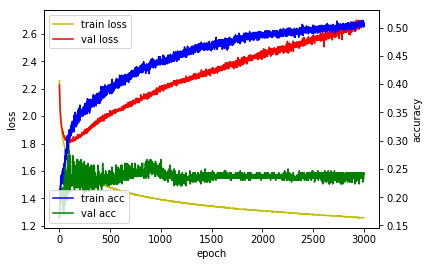

NameError: name 'x_test' is not defined

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch') #x축 이름 정하기
loss_ax.set_ylabel('loss') #y축 이름 정하기
acc_ax.set_ylabel('accuracy') 

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)

print('')
print('loss : '+ str(loss_and_metrics[0]))
print('accuracy : ' + str(loss_and_metrics[1]))












